<div class="alert alert-block alert-info">
<center>MÉTODOS NUMÉRICOS</center>
<center>LISTA 6 b</center>
<center>ALUNO: JONATAS DA SILVA DUARTE</center>
</div>


In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

np.__version__

'1.20.1'

1. Implemente os algoritmos da iteração de ponto fixo, Newton-Raphson e secante usando somente a biblioteca Numpy.

In [2]:
## PONTO FIXO
def ponto_fixo(g, x0, tt=1e-10, max_it=200):
    converg = True
    err = 1
    iteracoes = 0
    x1 = 0

    while(1):
        x1 = g(x0)
        err = np.abs((x1 - x0)/x1)        
        x0 = x1
        iteracoes += 1

        if err <= tt:
            break
            
        if iteracoes >= max_it:
            converg = False
            break

    return {
        'convergidos': converg,
        'iteracoes': iteracoes,
        'ponto': x1
    }

In [3]:
g = lambda x: np.exp(-x)
g

<function __main__.<lambda>(x)>

In [4]:
%%time
print("Com o algoritmo do PONTO FIXO: \n", ponto_fixo(g, 0))

Com o algoritmo do PONTO FIXO: 
 {'convergidos': True, 'iteracoes': 43, 'ponto': 0.567143290426651}
Wall time: 0 ns


In [5]:
## NEWTON-RAPHSON
def newton_raph(f, df, x, tt=1e-10):
    err = 1
    
    if f(x) == 0:
        return x
    
    while(1):
        x_ant = x
        x = x - f(x) / df(x)
        err = np.abs((x - x_ant) / x)
        if err <= tt:
            break
            
    return x

In [6]:
f = lambda x: np.exp(-x) - x
f

<function __main__.<lambda>(x)>

In [7]:
df = lambda x: -np.exp(-x) - 1
df

<function __main__.<lambda>(x)>

In [8]:
%%time
print("Com o algoritmo de NEWTON-RAPHSON: \n", newton_raph(f, df, 0))

Com o algoritmo de NEWTON-RAPHSON: 
 0.567143290409784
Wall time: 0 ns


In [9]:
## SECANTE
def secante(f, x0, x1, tt=1e-10):
    x2 = 0
    
    if f(x0) == 0:
        return x0
    
    if f(x1) == 0:
        return x1

    while(1):
        if f(x1) == f(x0):
            return

        ##x2 = (x0 - ((x1 - x0) * f(x0))) / (f(x1) - f(x0))
        x2 = x0 - (x1 - x0) * f(x0) / (f(x1) - f(x0))
        
        err = np.abs((x2 - x1) / x2)
        
        if err <= tt:
            break
        
        x0 = x1
        x1 = x2

    return x2

In [10]:
%%time
print("Com o algoritmo da SECANTE: \n", secante(f, -1, 0))

Com o algoritmo da SECANTE: 
 0.5671432904097838
Wall time: 0 ns


2. Use a iteração de ponto fixo simples para localizar a raiz de f (x) = 2 sin(px)− x, tendo x0 = 0, 5e adotando como critério de parada o erro ea ≤ 0, 001%.


In [11]:
g = lambda x: 2 * np.sin(np.sqrt(x))

In [12]:
%%time
ponto_fixo(g, 0.5, 0.00001)

Wall time: 0 ns


{'convergidos': True, 'iteracoes': 8, 'ponto': 1.9723804860817313}

3. Determine a maior raiz real de f (x) = 2x³ − 11.7x² + 17.7x − 5

In [13]:
f = lambda x: (2 * x ** 3 - 11.7 * x ** 2 + 17.7 * x - 5)
f

<function __main__.<lambda>(x)>

In [14]:
df = lambda y: (6 * y ** 2 - 23.4 * y + 17.7)
df

<function __main__.<lambda>(y)>

In [15]:
g = lambda z: ((2 * z ** 3 - 11.7 * z ** 2 - 5) / -17.7)
g

<function __main__.<lambda>(z)>

In [16]:
%%time
fun = secante(f, 3, 4)
fun

Wall time: 0 ns


3.5631608248620537

In [17]:
x = np.linspace(0, 4, 100)
x

array([0.        , 0.04040404, 0.08080808, 0.12121212, 0.16161616,
       0.2020202 , 0.24242424, 0.28282828, 0.32323232, 0.36363636,
       0.4040404 , 0.44444444, 0.48484848, 0.52525253, 0.56565657,
       0.60606061, 0.64646465, 0.68686869, 0.72727273, 0.76767677,
       0.80808081, 0.84848485, 0.88888889, 0.92929293, 0.96969697,
       1.01010101, 1.05050505, 1.09090909, 1.13131313, 1.17171717,
       1.21212121, 1.25252525, 1.29292929, 1.33333333, 1.37373737,
       1.41414141, 1.45454545, 1.49494949, 1.53535354, 1.57575758,
       1.61616162, 1.65656566, 1.6969697 , 1.73737374, 1.77777778,
       1.81818182, 1.85858586, 1.8989899 , 1.93939394, 1.97979798,
       2.02020202, 2.06060606, 2.1010101 , 2.14141414, 2.18181818,
       2.22222222, 2.26262626, 2.3030303 , 2.34343434, 2.38383838,
       2.42424242, 2.46464646, 2.50505051, 2.54545455, 2.58585859,
       2.62626263, 2.66666667, 2.70707071, 2.74747475, 2.78787879,
       2.82828283, 2.86868687, 2.90909091, 2.94949495, 2.98989

Wall time: 30.9 ms


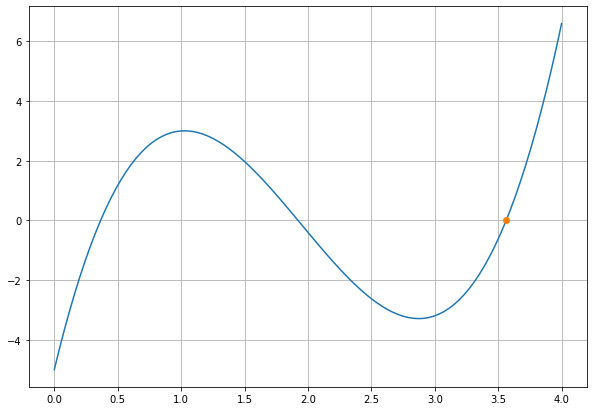

In [18]:
%%time
# Graficamente
plt.figure(figsize=(10, 7))
plt.grid()
plt.plot(x, f(x))
plt.plot(fun, 0, 'o')

In [19]:
%%time
## Ponto fixo
print("PONTO FIXO: \n\n", ponto_fixo(g, 3, max_it=3))

PONTO FIXO: 

 {'convergidos': False, 'iteracoes': 3, 'ponto': 3.442543246990202}
Wall time: 2 ms


In [20]:
%%time
## Newton-Raphson
print("NEWTON-RAPHSON: \n\n",newton_raph(f, df, 3))

NEWTON-RAPHSON: 

 3.5631608248620537
Wall time: 997 µs


In [21]:
%%time
## Secante
print("SECANTE: \n\n", secante(f, 3, 4))

SECANTE: 

 3.5631608248620537
Wall time: 0 ns
